<h1>Custom SGD vs Sk-Learn SGD Using boston dataset</h1>

In [1]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.datasets import load_boston
from random import seed
from random import randrange
from csv import reader
from math import sqrt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from prettytable import PrettyTable
from sklearn.metrics import mean_squared_error

In [2]:
# loading boston datasets
from sklearn.datasets import load_boston
import pandas as pd
boston=load_boston()
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [3]:
boston_df = pd.DataFrame(boston.data, columns=boston.feature_names)
boston_df['PRICE'] = boston.target

In [4]:
# spliting the data into train and test
from sklearn.model_selection import train_test_split
X_train_data, X_test_data, y_train_data, y_test_data = train_test_split(boston.data, boston.target, test_size = 0.20, random_state = 5)

In [5]:
#Function used to column standardize any given matrix
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
X_train_data = scalar.fit_transform(X_train_data)
X_test_data = scalar.transform(X_test_data)

<h1>Custom SGD</h1>

In [6]:
#refered ::::https://github.com/saugatapaul1010/Implement-SGD-from-scratch./blob/master/Implement%20SGD%20for%20Linear%20Regression%20for%20Boston%20Housing%20Dataset.ipynb
#computing manual sgd regressor 
def manual_sgd_regressor(X_train_data, y_train_data, lr_rate, lr_rate_variation, n_iterations, power_t):
    w_coeff=np.random.randn(13,1) #Randomly initalizing weights
    b_coeff=np.random.randn(1,1)  #Randomly picking up intercept value.
    
    for each_iterate in range(1,n_iterations+1):
        sum_errors = 0 #Sum of squared loss.
        N = X_train_data.shape[0] #The variable N in the SGD equation.

        for i in range(N):
            k = np.random.randint(0,N)  # random batch size for every iteration i.e k batch_size
            X_i = X_train_data[k,:].reshape(1,X_train_data.shape[1])
            y_i = y_train_data[k].reshape(1,1)

            y_pred = np.dot(X_i,w_coeff) + b_coeff 
            loss = y_pred - y_i                                      
            sum_errors += loss**2                                   

            w_grad = X_i.T.dot((y_pred - y_i))
            b_grad = (y_pred - y_i)

            w_coeff = w_coeff -(2/N)*lr_rate*(w_grad)
            b_coeff = b_coeff - (2/N)*lr_rate*(b_grad)


        if(lr_rate_variation=='invscaling'): #Implementing learning_rate 'invscaling' similar to that present in SGD Regressor.
            lr_rate = lr_rate / pow(each_iterate, power_t)
        else:
            pass

    return w_coeff, b_coeff

In [7]:
#This function is used to predict the class values given a test data.
def predict(X_test_data, w_coeff, b_coeff):
    X_test=np.array(X_test_data)
    y_pred =[]
    for i in range(0,len(X_test_data)):
        y=np.asscalar(np.dot(w_coeff,X_test_data[i]) + b_coeff) #Convert an array of size 1 to its scalar equivalent.
        y_pred.append(y)
    return np.array(y_pred)

In [8]:
#This function is used to plot the scatter plot between actual and predicted .
def plot_scatter(y_test_data,y_pred):
    plt.scatter(y_test_data,y_pred)
    plt.title('Scatter plot between Actual and Predicted Y.')
    plt.xlabel('Actual Y')
    plt.ylabel('Predicted Y')
    plt.grid(b=True, linewidth=0.5)
    plt.show()

    #Computing  the mean squared error between the actual and the predictual values.   
    mse=mean_squared_error(y_test_data,y_pred)
    print('MSE: ',mse)
    return mse

In [9]:
#above we declare function's below we calling functions with train data 
#here we fitting our model with train data with 1000 iterations 
w_coeff_optimal, b_coeff_optimal = manual_sgd_regressor(X_train_data, y_train_data, lr_rate=0.01, lr_rate_variation='constant', n_iterations=1000, power_t=None)


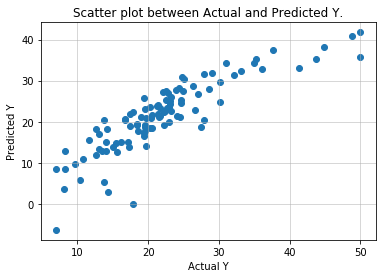

MSE:  20.749334205773142


In [10]:
#Predict the class labels of the test set using the optimal values obtained from the previous step.
y_pred = predict(X_test_data, w_coeff_optimal.T, b_coeff_optimal)

#Draw the scatter plot
mse1=plot_scatter(y_test_data,y_pred)

<h3>Observation</h3>
Almost all the values predicted good most of the values are matching with actual by predicted one's<br>
So the optimal line will be like starts in between 0-10 and some points little far away from line >=50 may act as outliers

In [11]:
wei=w_coeff_optimal

<h1> Implementing SK-Learn SGD </h1>

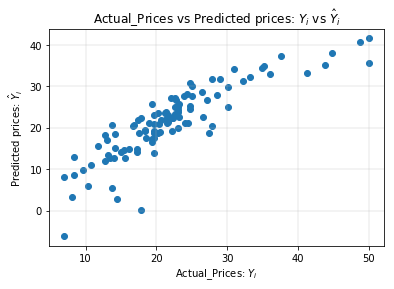

In [12]:
from sklearn.linear_model import SGDRegressor
#sklearn sgd for linear regression 
lr_sgd = SGDRegressor(loss='squared_loss', alpha=0.0001, random_state=0, learning_rate='invscaling', eta0=0.001, power_t=0.25, max_iter=1000)
lr_sgd.fit(X_train_data, y_train_data)
Y_pred_sgd = lr_sgd.predict(X_test_data)
#plotting 
plt.scatter(y_test_data, Y_pred_sgd)
plt.grid(b=True, linewidth=0.3)
plt.xlabel("Actual_Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Actual_Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")
plt.show()

<h3>Observation</h3>
Here also optimal line starts in between 0-10 and points >=50 may act as outliers 

In [13]:
#Computing MSE for SGD Linear regression 
sk_mse =mean_squared_error(y_test_data,Y_pred_sgd)
sk_mse

20.666060631866618

In [14]:
#sk-learn sgd weights
weight_sgd=lr_sgd.coef_

In [15]:
#applying hstack to both weight's for  better view of results 
sgd_wei=np.asarray(weight_sgd)
wei = np.asarray(wei)

<h2>Comparing Custom SGD weights and Sk-learn SGD weights</h2>

In [16]:
a=np.hstack(sgd_wei)
b=np.hstack(wei)
df=pd.DataFrame()
df['sklearn_sgd_weights']=a
df['manual_sgd_weights']=b
df

,sklearn_sgd_weights,manual_sgd_weights
0,-1.087573,-1.091179
1,1.057798,1.033346
2,-0.246502,-0.352066
3,0.724791,0.768723
4,-1.735503,-1.704433
5,2.416593,2.437497
6,-0.008287,-0.042099
7,-3.035109,-3.050201
8,2.466201,2.227559
9,-1.442188,-1.203465


<h2>Comparing  Custom SGD MSE  and Sk-Learn SGD MSE </h2>

In [17]:
print("MSE of  Custom SGD\t:",mse1)
print("MSE of SK Learn SGD\t:",sk_mse)

MSE of  Custom SGD	: 20.749334205773142
MSE of SK Learn SGD	: 20.666060631866618


<h2>LInear regression</h2>

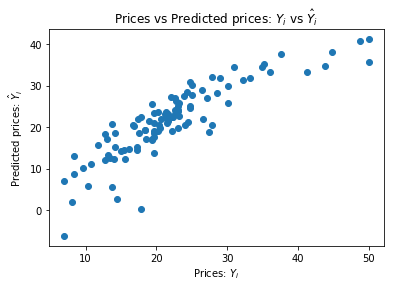

In [18]:
#applying sk-learn linear regression 
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(X_train_data, y_train_data)

Y_pred_lm = lm.predict(X_test_data)
#plotting 
plt.scatter(y_test_data , Y_pred_lm)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")
plt.show()

In [19]:
#mse of linear regression 
lr_mse =mean_squared_error(y_test_data ,Y_pred_lm)
print("MSE of  Linear regression\t:",lr_mse)


MSE of  Linear regression	: 20.869292183770813


In [20]:
#sk-learn linear regression  weights
weight_lm=lm.coef_
e=np.hstack(weight_lm)
e

array([-1.13502719,  1.15814527,  0.00737057,  0.68709635, -1.82837001,
        2.36271879,  0.03166538, -3.06632775,  3.16621482, -2.21457852,
       -2.08600876,  1.0449511 , -4.17627077])

In [21]:
df['sk_learn_linear_reg']=e
print("comparing weights for sk-learn sgd, manual sgd, and sk-learn linear regression ")
df

comparing weights for sk-learn sgd, manual sgd, and sk-learn linear regression 


,sklearn_sgd_weights,manual_sgd_weights,sk_learn_linear_reg
0,-1.087573,-1.091179,-1.135027
1,1.057798,1.033346,1.158145
2,-0.246502,-0.352066,0.007371
3,0.724791,0.768723,0.687096
4,-1.735503,-1.704433,-1.828370
5,2.416593,2.437497,2.362719
6,-0.008287,-0.042099,0.031665
7,-3.035109,-3.050201,-3.066328
8,2.466201,2.227559,3.166215
9,-1.442188,-1.203465,-2.214579


<h2>comparing mse's for manual ,sklearn sgd's and sklearn linear regression </h2>

In [22]:
#comparing mse's for manual ,sklearn sgd's and sklearn linear regression 
print("MSE of  Custom SGD\t\t:",mse1)
print("MSE of SK Learn SGD\t\t:",sk_mse)
print("MSE of  Linear regression\t:",lr_mse)


MSE of  Custom SGD		: 20.749334205773142
MSE of SK Learn SGD		: 20.666060631866618
MSE of  Linear regression	: 20.869292183770813


<h2>Obervations</h2>

1.Above implemented Custom SGD for linear regression with learning rate 0.01 and 1000 iteratons<br>
2.If iterations increases MSE will decreases  or constant is observed <br>
3.By comparing weights and MSE of both Custom and Sklearn SGD gives almost same results when high iteration <br>
4.Weights are changing for every run time cells because of we took random k points from the training data ,So MSE will vary at multiple executions <br>
5.Sk-learn SGD with good code complex and all these caluclations done internally in sk-learn SGD how ever results are almost same compare to custom SGD <br>
6.How ever we caluclated sk-learn linear regression and compare with both custom sgd and sk-learn sgd <br>
7.Linear regression from sk-learn also gives almost similar weights and similar for Linear Regreesion sk-learn  MSE(20) and  sk-learn sgd MSE(20) and custom sgd MSE(20) <br>
8.We get 20 as mse values for manual sgd and sk-learn's sgd and linear regression MSE at 20 is good <br>
9.So final statement is there no much difference in weights and MSE in   manual SGD and sk-learn SGD and sk-learn linear regression  are giving similar results